# Heart Disease Detection

## Steps:
* Step 1: Import common libraries
* Step 2: Getting the data
* Step 3: Picking the right estimator (Model)
* Step 4: Fit the data and make a prediction
* Step 5: Evaluate the model
* Step 6: Improving the model
* Step 7: Presenting results visually
* Step 8: Make observations
* Step 9: Recreate with the best model & hyperturning parameters
* Step 10: Save and load the model

## Step 1: Import common libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Step 2: Getting the Data

###### First we want to import the CSV from wherever it is located 

In [2]:
heart_data = pd.read_csv("OwnProject/heart.csv")


###### Then we will examine the data we will be working with

In [3]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0



###### We want to get rid of the target column as we will be training our model to predict it 

In [4]:
X = heart_data.drop(columns="target")
Y = heart_data["target"]

In [5]:
#Test to make sure X does not include target column
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [6]:
#Check the targets of Y
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


##### Splitting the data so 80% is used for training and 20% is used for testing

In [7]:
#Next we will split the data for training and testing purposes
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2) # Following a recommended split for test and training

In [8]:
#lets look at the training samples
X_train,Y_train

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 185   44    1   0       112   290    0        0      153      0      0.0   
 207   60    0   0       150   258    0        0      157      0      2.6   
 231   57    1   0       165   289    1        0      124      0      1.0   
 197   67    1   0       125   254    1        1      163      0      0.2   
 194   60    1   2       140   185    0        0      155      0      3.0   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 233   64    1   0       120   246    0        0       96      1      2.2   
 214   56    1   0       125   249    1        0      144      1      1.2   
 239   35    1   0       126   282    0        0      156      1      0.0   
 192   54    1   0       120   188    0        1      113      0      1.4   
 8     52    1   2       172   199    1        1      162      0      0.5   
 
      slope  ca  thal  
 185      2   1     2  
 207      1   2     3  
 2

In [9]:
#Lets look at the testing
X_test, Y_test

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 217   63    1   0       130   330    1        0      132      1      1.8   
 58    34    1   3       118   182    0        0      174      0      0.0   
 92    52    1   2       138   223    0        1      169      0      0.0   
 151   71    0   0       112   149    0        1      125      0      1.6   
 44    39    1   2       140   321    0        0      182      0      0.0   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 160   56    1   1       120   240    0        1      169      0      0.0   
 125   34    0   1       118   210    0        1      192      0      0.7   
 30    41    0   1       105   198    0        1      168      0      0.0   
 104   50    1   2       129   196    0        1      163      0      0.0   
 255   45    1   0       142   309    0        0      147      1      0.0   
 
      slope  ca  thal  
 217      2   3     3  
 58       2   0     2  
 9

## Step 3: Picking the right estimator (Model)

#### Time to pick a good estimator (model). A good resource I found is to use the scikit-learn machine learning map. https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html 

###### Is size of sample less than 50? If yes, then get more data. If no, then move along the arrow.

In [10]:
len(heart_data) # To make sure we have more than 50 data as it suggests

303

###### We have more than 50 samples, and we are predicting a category. So now, we have to chose between a classification problem or clustering. Since we have labeled data, we will use the classifcation approach. Now that we have determined our problem type, we can see we have <100k samples. Therefore we will use what it recomends us,  Linear svm.

In [11]:
from sklearn import svm
clf = svm.SVC()


## Step 4: Fit the data and make a prediction


###### Fitting the data

In [12]:
clf.fit(X_train,Y_train)

SVC()

##### Predict the data


In [13]:
y_probs = clf.predict(X_test)

In [14]:
y_probs #Examining the Y_probs

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)


## Step 5: Evaluate the model

###### There are several types of metrics that can be used to test a model. I will be using accuracy to score the prediction

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_probs)

0.819672131147541


## Step 6: Improving the model

###### One way to improve a model is by hyptertuning. Specifcally the parameters of the estimator we chose to create our model. 

In [16]:
np.random.seed(50)
pltDict = {}
for i in range(1000,500000,10000):
    print(f"Trying model with C value {i}:")
    clf = svm.SVC(C=i).fit(X_train, Y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, Y_test) * 100:.2f}%")
    pltDict[i]=clf.score(X_test, Y_test) * 100
    print("")

Trying model with C value 1000:
Model accuracy on test set: 85.25%

Trying model with C value 11000:
Model accuracy on test set: 80.33%

Trying model with C value 21000:
Model accuracy on test set: 80.33%

Trying model with C value 31000:
Model accuracy on test set: 78.69%

Trying model with C value 41000:
Model accuracy on test set: 77.05%

Trying model with C value 51000:
Model accuracy on test set: 75.41%

Trying model with C value 61000:
Model accuracy on test set: 75.41%

Trying model with C value 71000:
Model accuracy on test set: 75.41%

Trying model with C value 81000:
Model accuracy on test set: 77.05%

Trying model with C value 91000:
Model accuracy on test set: 77.05%

Trying model with C value 101000:
Model accuracy on test set: 77.05%

Trying model with C value 111000:
Model accuracy on test set: 75.41%

Trying model with C value 121000:
Model accuracy on test set: 75.41%

Trying model with C value 131000:
Model accuracy on test set: 75.41%

Trying model with C value 14100

In [17]:
#View dictionary to confirm if the percentages match up
pltDict

{1000: 85.24590163934425,
 11000: 80.32786885245902,
 21000: 80.32786885245902,
 31000: 78.68852459016394,
 41000: 77.04918032786885,
 51000: 75.40983606557377,
 61000: 75.40983606557377,
 71000: 75.40983606557377,
 81000: 77.04918032786885,
 91000: 77.04918032786885,
 101000: 77.04918032786885,
 111000: 75.40983606557377,
 121000: 75.40983606557377,
 131000: 75.40983606557377,
 141000: 73.77049180327869,
 151000: 73.77049180327869,
 161000: 73.77049180327869,
 171000: 73.77049180327869,
 181000: 72.1311475409836,
 191000: 70.49180327868852,
 201000: 72.1311475409836,
 211000: 73.77049180327869,
 221000: 73.77049180327869,
 231000: 73.77049180327869,
 241000: 73.77049180327869,
 251000: 73.77049180327869,
 261000: 73.77049180327869,
 271000: 73.77049180327869,
 281000: 73.77049180327869,
 291000: 73.77049180327869,
 301000: 73.77049180327869,
 311000: 73.77049180327869,
 321000: 73.77049180327869,
 331000: 73.77049180327869,
 341000: 73.77049180327869,
 351000: 75.40983606557377,
 3610

## Step 7: Presenting results visually


###### Here I will be using Matplotlib's pyplot to graph the hypertuning param values to see which one gave us the best accuracy

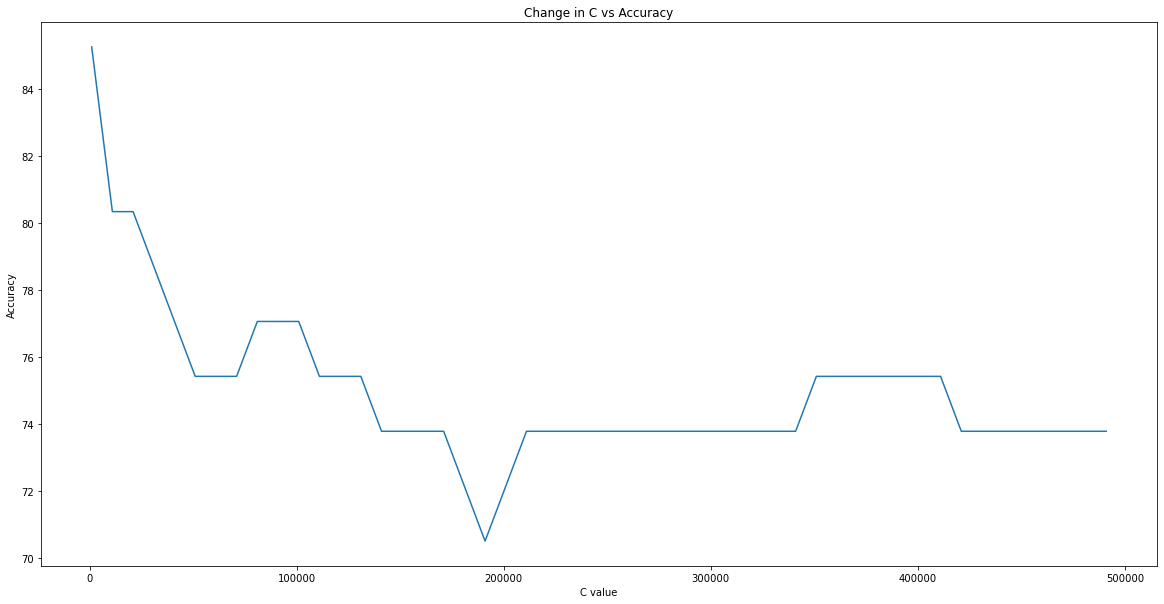

In [18]:
#PLot the data to see which yields in the highest accuracy 
Xaxis = list(pltDict.keys())
Yaxis = list(pltDict.values())
fig,ax= plt.subplots(figsize=(20,10))
ax.plot(Xaxis,Yaxis)
ax.set(title="Change in C vs Accuracy", xlabel="C value", ylabel="Accuracy");


## Step 8: Make observations

######  We will want to see if the accuracy is worth giving up the performance

In [19]:
C_1000  = %timeit svm.SVC(C=1000)
C_491000 = %timeit svm.SVC(C=491000)
C_1000,C_491000

4.26 µs ± 334 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.8 µs ± 171 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


(None, None)

###### Conclusion: 
* Performance remains the same with the adjustment of C value because the Big-O is constant. The iterations of loops does not change.
* The bigger the C value does not always correlate to better accuracy. 
* You have to find the right paramter that will tweek it just enough to increase it to its best accuracy. 

## Step 9: Recreate with the best model & hyperturning parameters

In [20]:
clf = svm.SVC(C=max(pltDict, key=pltDict.get))
clf.fit(X_train,Y_train)
y_probs = clf.predict(X_test)
clf.score(X_test, Y_test) * 100

85.24590163934425

## Step 10: Save and load the model

In [21]:
import pickle
pickle.dump(clf,open("Heart_disease_project.pkl","wb"))#save file
load_pickle = pickle.load(open("Heart_disease_project.pkl","rb"))#load file
load_pickle.score(X_test,Y_test)*100

85.24590163934425

In [22]:
#Now just to make sure it truly works lets compare the results with its true target
clf.predict(X_test),np.array(Y_test)

(array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int64),
 array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int64))